In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")


# Data Preprocessing

In [2]:
# Load cleaned dataset
df = pd.read_parquet("../data/SCADA_Cleaned.parquet")

# If datetime is in index, make sure it's parsed properly
df.index = pd.to_datetime(df.index, errors="coerce")
df = df[~df.index.isna()].sort_index()

# Select features based on EDA
features = ["RotorSpeed", "GeneratorTemperature", "WindSpeed",
            "PowerOutput", "MaxWindHeute", "PitchDeg"]
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Fit Isolation Forest

In [3]:
# Initialize Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model and predict anomalies (-1 for outliers, 1 for inliers)
df["anomaly"] = model.fit_predict(X_scaled)

# Filter out detected anomalies (outliers)
df_anomaly = df[df["anomaly"] == -1]


# Anomaly Detection Plot

/var/folders/_r/zh29h5990j3bq7mwz_6kjmbm0000gn/T/ipykernel_93384/1109461920.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/leslie.hadaway/Projects/wind_turbine_anomaly_detection/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


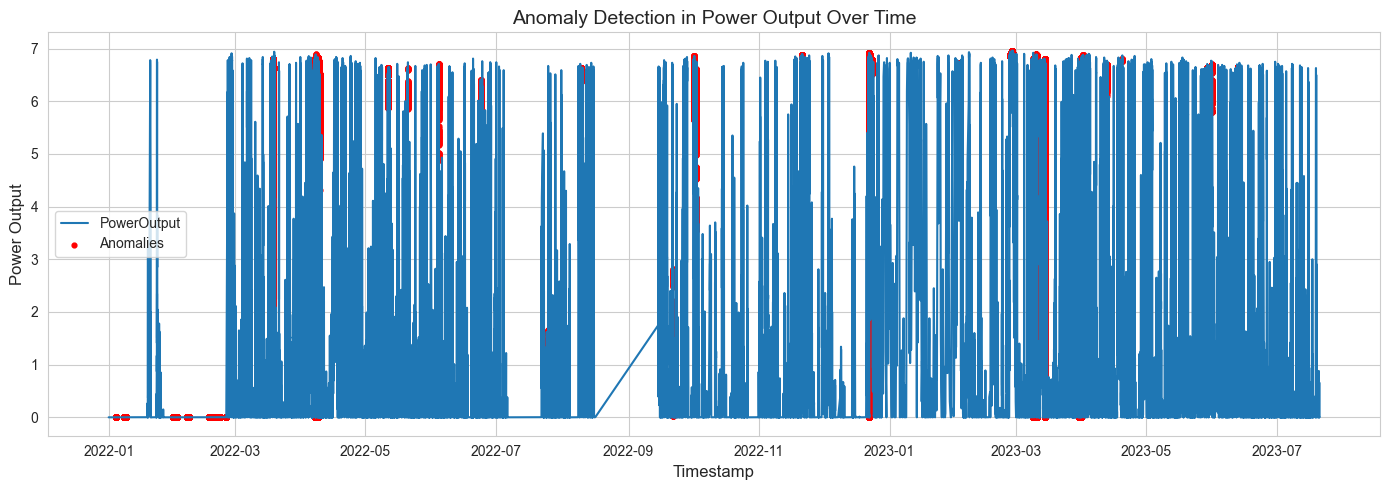

In [4]:
# Create figure
plt.figure(figsize=(14, 5))

# Line plot for power output
plt.plot(df.index, df["PowerOutput"], label="PowerOutput")

# Scatter plot for anomalies
plt.scatter(x=df_anomaly.index, y=df_anomaly["PowerOutput"],
            color="red", label="Anomalies", s=12)

# Titles and labels
plt.title("Anomaly Detection in Power Output Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Output", fontsize=12)

# Adjust layout and display the plot
plt.legend()
plt.tight_layout()
plt.show()


# Anomaly Score Distribution

In [5]:
# Scores: the lower, the more anomalous
df["anomaly_score"] = model.decision_function(X_scaled)


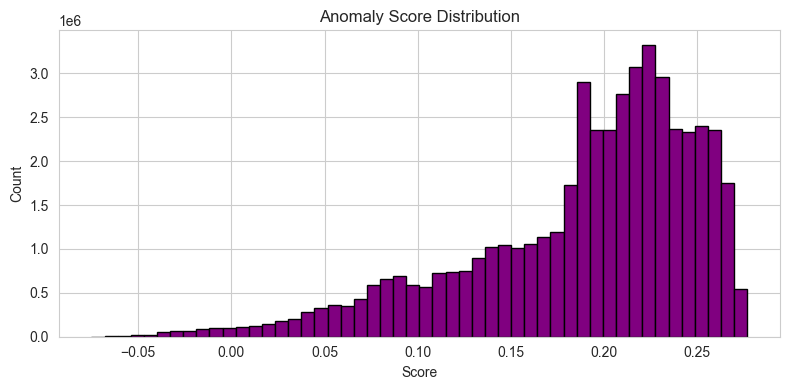

In [6]:
# Create a histogram to visualize the distribution of anomaly scores
plt.figure(figsize=(8, 4))
plt.hist(x=df["anomaly_score"], bins=50, color="purple", edgecolor="black")

# Titles and labels
plt.title("Anomaly Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Anomaly Percentage

In [13]:
# Calculate the percentage of anomalies detected
anomaly_rate = df_anomaly.shape[0] / len(df) * 100

# Print the total number of anomalies and their percentage
print(f"Anomalies detected: {df_anomaly.shape[0]:,} out of {len(df):,} rows ({anomaly_rate:.2f}%)")


Anomalies detected: 488,967 out of 48,898,460 rows (1.00%)


# Compare Anomaly vs Normal Stats

In [8]:
# Display summary statistics for normal (non-anomalous) data
print("Normal (non-anomalous) summary:\n", df[df["anomaly"] == 1][features].describe())

# Display summary statistics for detected anomalies
print("\nAnomalies summary:\n", df_anomaly[features].describe())


Normal (non-anomalous) summary:
          RotorSpeed  GeneratorTemperature     WindSpeed   PowerOutput  \
count  4.840949e+07          4.840949e+07  4.840949e+07  4.840949e+07   
mean   2.098847e+01          2.911939e+01  2.429854e+00  1.101450e+00   
std    2.186495e+01          1.495474e+01  1.926181e+00  1.871044e+00   
min    0.000000e+00         -5.000000e-01  0.000000e+00  0.000000e+00   
25%    0.000000e+00          1.797280e+01  1.064896e+00  0.000000e+00   
50%    1.437066e+01          2.835031e+01  2.031481e+00  8.497835e-02   
75%    3.776890e+01          3.826615e+01  3.310740e+00  1.298356e+00   
max    6.810000e+01          8.240000e+01  1.593333e+01  6.960000e+00   

       MaxWindHeute      PitchDeg  
count  4.840949e+07  4.840949e+07  
mean   7.257928e+00  3.102542e+01  
std    4.677158e+00  1.946043e+01  
min    0.000000e+00  1.403400e+01  
25%    3.800000e+00  1.403400e+01  
50%    6.200000e+00  2.752348e+01  
75%    9.700000e+00  3.819185e+01  
max    3.950000e+01  

# Zoom into a Specific Date Range

In [9]:
# Filter data for the period between May 1, 2022, and June 1, 2022
df_may_22 = df["2022-05-01":"2022-06-01"]

# Extract anomalies from the filtered period
df_may_22_anomaly = df_may_22[df_may_22["anomaly"] == -1]


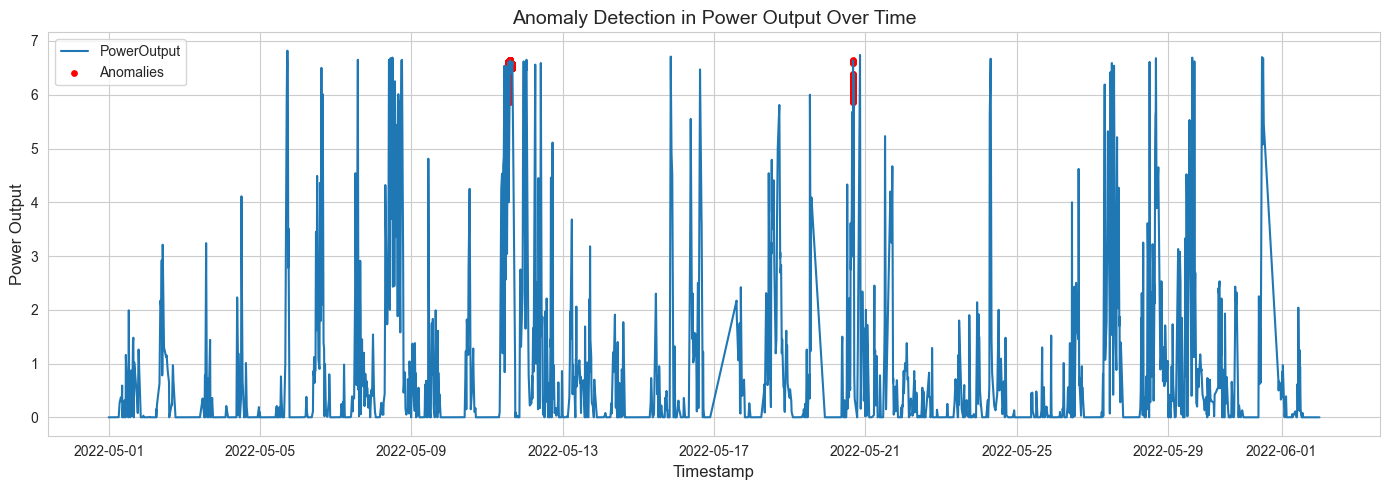

In [10]:
# Create figure
plt.figure(figsize=(14, 5))

# Line plot for power output
plt.plot(df_may_22.index, df_may_22["PowerOutput"], label="PowerOutput")

# Scatter plot for anomalies
plt.scatter(x=df_may_22_anomaly.index, y=df_may_22_anomaly["PowerOutput"],
            color="red", label="Anomalies", s=15)

# Titles and labels
plt.title("Anomaly Detection in Power Output Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Output", fontsize=12)

# Adjust layout and display the plot
plt.legend()
plt.tight_layout()
plt.show()


# Summary Stats

In [14]:
# Calculate the percentage of anomalies detected
anomaly_rate = df_anomaly.shape[0] / len(df) * 100

# Print the total number of anomalies and their percentage
print(f"Anomalies detected: {df_anomaly.shape[0]:,} out of {len(df):,} rows ({anomaly_rate:.2f}%)")


Anomalies detected: 488,967 out of 48,898,460 rows (1.00%)
